## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras
from sklearn.preprocessing import MinMaxScaler
# 請嘗試設定 GPU：os.environ
scaler = MinMaxScaler(feature_range=(-1,1))

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
# def preproc_x(x):
#     Min_Max_Scaler = preprocessing.MinMaxScaler(feature_range=(-1,1)) # 設定縮放的區間上下限
#     x = Min_Max_Scaler.fit_transform(x)
#     return x

def preproc_x(x, flatten=True):
    if flatten:
        x = scaler.fit_transform(x.reshape((len(x), -1)))    
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330   

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 21ms/step - loss: 1.7104 - accuracy: 0.3949 - val_loss: 1.5379 - val_accuracy: 0.4537
Epoch 2/100
196/196 [==============================] - 3s 18ms/step - loss: 1.4766 - accuracy: 0.4804 - val_loss: 1.4318 - val_accuracy: 0.4931
Epoch 3/100
196/196 [==============================] - 4s 18ms/step - loss: 1.3588 - accuracy: 0.5210 - val_loss: 1.4407 - val_accuracy: 0.4958
Epoch 4/100
196/196 [==============================] - 4s 19ms/step - loss: 1.2669 - accuracy: 0.5542 - val_loss: 1.3973 - val_accuracy: 0.5128
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.1799 - accuracy: 0.5851 - val_loss: 1.3716 - val_accuracy: 0.5262
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.1012 - accuracy: 0.6124 - val_loss: 1.3715 - val_accuracy: 0.5286
Epoch 7/100
196/196 [==============================] - 4s 18ms/step - loss: 1.0316 - accuracy: 0.6357 - val_loss: 1.3534 - val_accuracy:

196/196 [==============================] - 4s 22ms/step - loss: 0.0909 - accuracy: 0.9697 - val_loss: 4.1951 - val_accuracy: 0.5256
Epoch 58/100
196/196 [==============================] - 4s 21ms/step - loss: 0.0913 - accuracy: 0.9696 - val_loss: 4.3503 - val_accuracy: 0.5241
Epoch 59/100
196/196 [==============================] - 4s 22ms/step - loss: 0.1140 - accuracy: 0.9622 - val_loss: 4.0375 - val_accuracy: 0.5202
Epoch 60/100
196/196 [==============================] - 5s 23ms/step - loss: 0.0878 - accuracy: 0.9707 - val_loss: 4.3429 - val_accuracy: 0.5287
Epoch 61/100
196/196 [==============================] - 4s 22ms/step - loss: 0.1058 - accuracy: 0.9656 - val_loss: 4.1659 - val_accuracy: 0.5271
Epoch 62/100
196/196 [==============================] - 4s 21ms/step - loss: 0.1081 - accuracy: 0.9653 - val_loss: 4.0975 - val_accuracy: 0.5321
Epoch 63/100
196/196 [==============================] - 4s 23ms/step - loss: 0.0979 - accuracy: 0.9680 - val_loss: 4.0264 - val_accuracy: 0.521

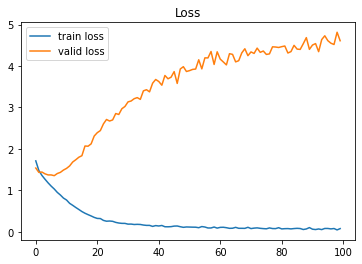

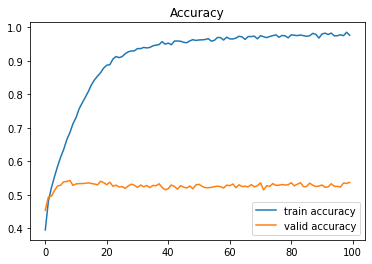

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# 增加層數的情況下，train_data的準確率有提升，但valid_data loss也有上升